<a href="https://colab.research.google.com/github/Young-Dong/nlp/blob/main/nlp100_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**第4章: 形態素解析**

夏目漱石の小説『吾輩は猫である』の文章（[neko.txt](https://nlp100.github.io/data/neko.txt)）を[MeCab](https://taku910.github.io/mecab/)を使って形態素解析し，その結果をneko.txt.mecabというファイルに保存せよ．このファイルを用いて，以下の問に対応するプログラムを実装せよ．

なお，問題37, 38, 39はmatplotlibもしくはGnuplotを用いるとよい．

In [ ]:
! lsb_release -a

No LSB modules are available.
Distributor ID:	Ubuntu
Description:	Ubuntu 18.04.5 LTS
Release:	18.04
Codename:	bionic


In [ ]:
! sudo apt install mecab
! sudo apt install libmecab-dev
! sudo apt install mecab-ipadic-utf8
# ! pip install MeCab

Reading package lists... Done
Building dependency tree       
Reading state information... Done
mecab is already the newest version (0.996-5).
0 upgraded, 0 newly installed, 0 to remove and 37 not upgraded.
Reading package lists... Done
Building dependency tree       
Reading state information... Done
libmecab-dev is already the newest version (0.996-5).
0 upgraded, 0 newly installed, 0 to remove and 37 not upgraded.
Reading package lists... Done
Building dependency tree       
Reading state information... Done
mecab-ipadic-utf8 is already the newest version (2.7.0-20070801+main-1).
0 upgraded, 0 newly installed, 0 to remove and 37 not upgraded.


In [ ]:
!wget https://nlp100.github.io/data/neko.txt
!mecab -o ./neko.txt.mecab ./neko.txt

--2021-11-09 06:35:20--  https://nlp100.github.io/data/neko.txt
Resolving nlp100.github.io (nlp100.github.io)... 185.199.109.153, 185.199.108.153, 185.199.111.153, ...
Connecting to nlp100.github.io (nlp100.github.io)|185.199.109.153|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 975789 (953K) [text/plain]
Saving to: ‘neko.txt’

neko.txt            100%[===================>] 952.92K  --.-KB/s    in 0.03s   

2021-11-09 06:35:20 (29.1 MB/s) - ‘neko.txt’ saved [975789/975789]



**30. 形態素解析結果の読み込み**

形態素解析結果（neko.txt.mecab）を読み込むプログラムを実装せよ．ただし，各形態素は表層形（surface），基本形（base），品詞（pos），品詞細分類1（pos1）をキーとするマッピング型に格納し，1文を形態素（マッピング型）のリストとして表現せよ．第4章の残りの問題では，ここで作ったプログラムを活用せよ．

In [ ]:
import pandas as pd
from io import StringIO

with open('neko.txt.mecab') as f:
  mecab = f.read().replace('\t',',')

df = pd.read_csv(StringIO(mecab), sep=',', header=None)
neko = [{'surface':df.iloc[i][0],
        'base':df.iloc[i][7], 
        'pos':df.iloc[i][1], 
        'pos1':df.iloc[i][2]}
        for i in range(df.shape[0])]

print(len(neko))

226266


In [ ]:
neko

[{'base': '一', 'pos': '名詞', 'pos1': '数', 'surface': '一'},
 {'base': '*', 'pos': '記号', 'pos1': '一般', 'surface': nan},
 {'base': nan, 'pos': nan, 'pos1': nan, 'surface': 'EOS'},
 {'base': '*', 'pos': '記号', 'pos1': '一般', 'surface': nan},
 {'base': nan, 'pos': nan, 'pos1': nan, 'surface': 'EOS'},
 {'base': '\u3000', 'pos': '記号', 'pos1': '空白', 'surface': '\u3000'},
 {'base': '吾輩', 'pos': '名詞', 'pos1': '代名詞', 'surface': '吾輩'},
 {'base': 'は', 'pos': '助詞', 'pos1': '係助詞', 'surface': 'は'},
 {'base': '猫', 'pos': '名詞', 'pos1': '一般', 'surface': '猫'},
 {'base': 'だ', 'pos': '助動詞', 'pos1': '*', 'surface': 'で'},
 {'base': 'ある', 'pos': '助動詞', 'pos1': '*', 'surface': 'ある'},
 {'base': '。', 'pos': '記号', 'pos1': '句点', 'surface': '。'},
 {'base': '*', 'pos': '記号', 'pos1': '一般', 'surface': nan},
 {'base': nan, 'pos': nan, 'pos1': nan, 'surface': 'EOS'},
 {'base': '名前', 'pos': '名詞', 'pos1': '一般', 'surface': '名前'},
 {'base': 'は', 'pos': '助詞', 'pos1': '係助詞', 'surface': 'は'},
 {'base': 'まだ', 'pos': '副詞', 'pos1': '

**31. 動詞**

動詞の表層形をすべて抽出せよ．

In [ ]:
verb = set()
for i in neko:
  if i['pos'] == '動詞':
    verb.add(i['surface'])
print(len(verb))

3893


**32. 動詞の基本形**

動詞の基本形をすべて抽出せよ．

In [ ]:
verb_base = set()
for i in neko:
  if i['pos'] == '動詞':
    verb_base.add(i['base'])
print(len(verb_base))

2300


**33. 「AのB」**

2つの名詞が「の」で連結されている名詞句を抽出せよ．

In [ ]:
neko.index(i)

2

In [ ]:
a_no_b = set()
for j in range(len(neko)):
  if neko[j]['surface'] == 'の' and neko[j-1]['pos'] == '名詞' and neko[j+1]['pos'] == '名詞':
    a_no_b.add(neko[j-1]['surface'] + neko[j]['surface'] + neko[j+1]['surface'])
print(len(a_no_b))

4924


**34. 名詞の連接**


名詞の連接（連続して出現する名詞）を最長一致で抽出せよ．

In [ ]:
# 名詞であると後ろは名詞であるかを識別し、連続名詞数をcountする
nouns = []
max_counts = 0
for i in range(len(neko)):
  if neko[i]['pos'] == '名詞':
    nouns_counts = 0
    for j in range(len(neko)-1):
      if neko[i+j]['pos'] == '名詞':
        nouns_counts += 1
      else:
        break
      if nouns_counts >= max_counts:
        max_counts = nouns_counts
        nouns.append({'noun_no':i, 'noun_counts':nouns_counts})

In [ ]:
# 最大値のnoとlengthを抽出
longest_nouns_no = []
for i in range(len(nouns)):
  if nouns[i]['noun_counts'] == max_counts:
    longest_nouns_no.append(nouns[i]['noun_no'])

In [ ]:
# 文字の抽出
longest_nouns = []
for i in longest_nouns_no:
  tmp = ''
  for j in range(max_counts):
    tmp += neko[i+j]['surface']
  longest_nouns.append(tmp)

In [ ]:
longest_nouns

["manyaslip'twixtthecupandthelip", '明治三十八年何月何日戸締り']

**35. 単語の出現頻度**

文章中に出現する単語とその出現頻度を求め，出現頻度の高い順に並べよ．

In [ ]:
df_word = df[(df.iloc[:][1]!='記号') & (df.iloc[:][0]!='EOS')]
df_word[0].value_counts()

の         9194
て         6868
は         6420
に         6243
を         6071
          ... 
文久           1
パレオロガス       1
かま           1
放課後          1
買お           1
Name: 0, Length: 13559, dtype: int64

**36. 頻度上位10語**

出現頻度が高い10語とその出現頻度をグラフ（例えば棒グラフなど）で表示せよ．

In [ ]:
! pip install japanize_matplotlib

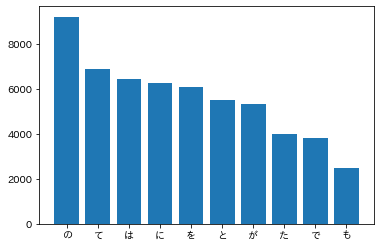

In [ ]:
import matplotlib.pyplot as plt
import japanize_matplotlib

df_plt = df_word[0].value_counts().head(10)
plt.bar(df_plt.index, df_plt.values)
plt.show()

**37. 「猫」と共起頻度の高い上位10語**

「猫」とよく共起する（共起頻度が高い）10語とその出現頻度をグラフ（例えば棒グラフなど）で表示せよ．

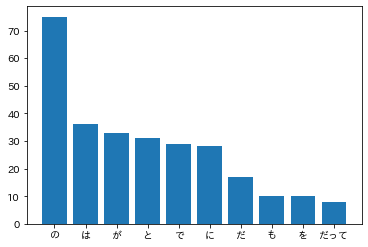

In [ ]:
# 猫の行の抽出
df_cat_around = pd.concat([df_word[df_word.iloc[:][0].shift(-1)=='猫'], df_word[df_word.iloc[:][0].shift(1)=='猫']])
df_plt_cat = df_cat_around[0].value_counts().head(10)
plt.bar(df_plt_cat.index, df_plt_cat.values)
plt.show()

**38. ヒストグラム**

単語の出現頻度のヒストグラムを描け．ただし，横軸は出現頻度を表し，1から単語の出現頻度の最大値までの線形目盛とする．縦軸はx軸で示される出現頻度となった単語の異なり数（種類数）である．

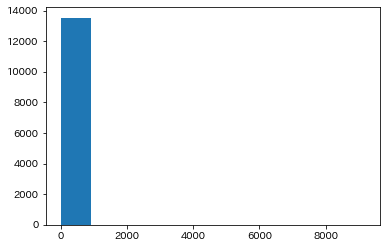

In [ ]:
df_plt = df_word[0].value_counts()
plt.hist(df_plt.values)
plt.show()

**39. Zipfの法則**

単語の出現頻度順位を横軸，その出現頻度を縦軸として，両対数グラフをプロットせよ．

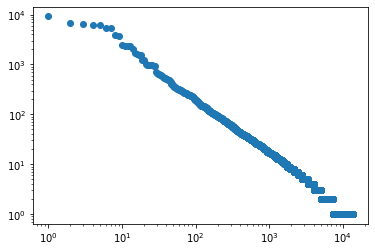

In [ ]:
df_plt = df_word[0].value_counts()
plt.scatter(range(1, len(df_plt)+1), df_plt.values)
plt.xscale('log')
plt.yscale('log')
plt.show()